In [2]:
%matplotlib inline


# Permutation F-test on sensor data with 1D cluster level


One tests if the evoked response is significantly different
between conditions. Multiple comparison problem is addressed
with cluster level permutation test.


In [3]:
# Authors: Alexandre Gramfort <alexandre.gramfort@inria.fr>
#
# License: BSD (3-clause)

import matplotlib.pyplot as plt

import mne
from mne import io
from mne.stats import permutation_cluster_test
from mne.datasets import sample

print(__doc__)

Automatically created module for IPython interactive environment


Set parameters



In [4]:
data_path = sample.data_path()
raw_fname = data_path + '/MEG/sample/sample_audvis_filt-0-40_raw.fif'
event_fname = data_path + '/MEG/sample/sample_audvis_filt-0-40_raw-eve.fif'
tmin = -0.2
tmax = 0.5

#   Setup for reading the raw data
raw = io.read_raw_fif(raw_fname)
events = mne.read_events(event_fname)

channel = 'MEG 1332'  # include only this channel in analysis
include = [channel]

Opening raw data file /home/karim/mne_data/MNE-sample-data/MEG/sample/sample_audvis_filt-0-40_raw.fif...
    Read a total of 4 projection items:
        PCA-v1 (1 x 102)  idle
        PCA-v2 (1 x 102)  idle
        PCA-v3 (1 x 102)  idle
        Average EEG reference (1 x 60)  idle
    Range : 6450 ... 48149 =     42.956 ...   320.665 secs
Ready.
Current compensation grade : 0


Read epochs for the channel of interest



In [5]:
picks = mne.pick_types(raw.info, meg=False, eog=True, include=include,
                       exclude='bads')
event_id = 1
reject = dict(grad=4000e-13, eog=150e-6)
epochs1 = mne.Epochs(raw, events, event_id, tmin, tmax, picks=picks,
                     baseline=(None, 0), reject=reject)
condition1 = epochs1.get_data()  # as 3D matrix

event_id = 2
epochs2 = mne.Epochs(raw, events, event_id, tmin, tmax, picks=picks,
                     baseline=(None, 0), reject=reject)
condition2 = epochs2.get_data()  # as 3D matrix

condition1 = condition1[:, 0, :]  # take only one channel to get a 2D array
condition2 = condition2[:, 0, :]  # take only one channel to get a 2D array

72 matching events found
Applying baseline correction (mode: mean)
Not setting metadata
4 projection items activated
Loading data for 72 events and 106 original time points ...
    Rejecting  epoch based on EOG : ['EOG 061']
    Rejecting  epoch based on EOG : ['EOG 061']
    Rejecting  epoch based on EOG : ['EOG 061']
    Rejecting  epoch based on EOG : ['EOG 061']
    Rejecting  epoch based on EOG : ['EOG 061']
    Rejecting  epoch based on EOG : ['EOG 061']
    Rejecting  epoch based on EOG : ['EOG 061']
    Rejecting  epoch based on EOG : ['EOG 061']
    Rejecting  epoch based on EOG : ['EOG 061']
    Rejecting  epoch based on EOG : ['EOG 061']
    Rejecting  epoch based on EOG : ['EOG 061']
    Rejecting  epoch based on EOG : ['EOG 061']
    Rejecting  epoch based on EOG : ['EOG 061']
    Rejecting  epoch based on EOG : ['EOG 061']
    Rejecting  epoch based on EOG : ['EOG 061']
    Rejecting  epoch based on EOG : ['EOG 061']
16 bad epochs dropped
73 matching events found
Applying

Compute statistic



In [6]:
threshold = 6.0
T_obs, clusters, cluster_p_values, H0 = \
    permutation_cluster_test([condition1, condition2], n_permutations=1000,
                             threshold=threshold, tail=1, n_jobs=1)

stat_fun(H1): min=0.000227 max=38.167093
Running initial clustering
Found 4 clusters
Permuting 999 times...
[........................................................] 100.00%  |   
Computing cluster p-values
Done.


Plot



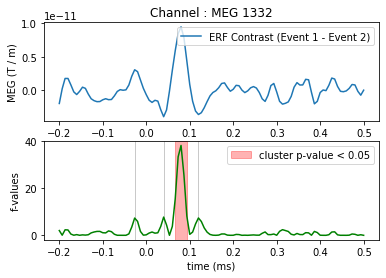

In [7]:
times = epochs1.times
plt.close('all')
plt.subplot(211)
plt.title('Channel : ' + channel)
plt.plot(times, condition1.mean(axis=0) - condition2.mean(axis=0),
         label="ERF Contrast (Event 1 - Event 2)")
plt.ylabel("MEG (T / m)")
plt.legend()
plt.subplot(212)
for i_c, c in enumerate(clusters):
    c = c[0]
    if cluster_p_values[i_c] <= 0.05:
        h = plt.axvspan(times[c.start], times[c.stop - 1],
                        color='r', alpha=0.3)
    else:
        plt.axvspan(times[c.start], times[c.stop - 1], color=(0.3, 0.3, 0.3),
                    alpha=0.3)
hf = plt.plot(times, T_obs, 'g')
plt.legend((h, ), ('cluster p-value < 0.05', ))
plt.xlabel("time (ms)")
plt.ylabel("f-values")
plt.show()